# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Capstone dengan topik Webscraping ini berfungsi untuk mempelajari bagaimana cara mengambil data mengenai berita dari website. Dengan menggunakan kata kunci tertentu, kita peroleh beritanya kemudian kita mencari codingnya dengan menggunakan inspect. Lalu setelah HTML diperoleh, tinggal kita cari koding buat bagian2 yang akan kita ambil sebagai kolom. Misalkan di tugas ini adalah title, description, dan datenya. Kemudian kita ambil data text nya, lalu kita buat tabelnya. 
Setelah itu kita buat word cloud nya

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [10]:
import requests

url_get = requests.get('https://www.detik.com/search/searchall?query=gempa')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [11]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<html lang="id-ID">\r\n\t<head>\r\n\t<link rel="preconnect" href="https://awscdn.detik.net.id"><link rel="preconnect" href="https://awscdn.detik.net.id" crossorigin><link rel="preconnect" href="https://cdn.detik.net.id"><link rel="preconnect" href="https://cdn.detik.net.id" crossorigin>\t<link rel="dns-prefetch" href="https://cdn.detik.net.id"/><link rel="dns-prefetch" href="https://akcdn.detik.net.id"/><link rel="dns-prefetch" href="https://cdnv.detik.net.id"/><link rel="dns-prefetch"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [12]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [13]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="id-ID">
 <head>
  <link href="https://awscdn.detik.net.id" rel="preconnect"/>
  <link crossorigin="" href="https://awscdn.detik.net.id" rel="preconnect"/>
  <link href="https://cdn.detik.net.id" rel="preconnect"/>
  <link crossorigin="" href="https://cdn.detik.net.id" rel="preconnect"/>
  <link href="https://cdn.detik.net.id" rel="dns-prefetch">
   <link href="https://akcdn.detik.net.id" rel="dns-prefetch">
    <link href="https://cdnv.detik.net.id" rel="dns-prefetch"


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

disini kita mencari tagnya, disini kebetulan 'div' walaupun nanti dibag lain bisa saja lainnya, misalnya 'h3', lalu setelah itu kita cari yang unik, disini attribut, class, sesuai websitenya masing-masing. Kemudian kita lihat informasinya.

In [14]:
table = soup.find('div', attrs={'class':'list-content'})
print(table.prettify()[1:500])

div class="list-content">
 <article class="list-content__item">
  <div class="media media--right media--image-radius block-link">
   <div class="media__image">
    <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7516948" dtr-idx="1" dtr-sec="search result relevansi" dtr-ttl="Gempa M 4,1 Terjadi di Merangin Jambi" href="https://news.detik.com/berita/d-7516948/gempa-m-4-1-terjadi-di-merangin-jambi" onclick="_pt(this)">
     <span class="ratiobox ratiobox--4-3 lq


In [15]:
table.find_all('h3', attrs={'class':'media__title'})

[<h3 class="media__title">
 <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7516948" dtr-idx="1" dtr-sec="search result relevansi" dtr-ttl="Gempa M 4,1 Terjadi di Merangin Jambi" href="https://news.detik.com/berita/d-7516948/gempa-m-4-1-terjadi-di-merangin-jambi" onclick="_pt(this)">Gempa M 4,1 Terjadi di Merangin Jambi</a>
 </h3>,
 <h3 class="media__title">
 <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7517100" dtr-idx="2" dtr-sec="search result relevansi" dtr-ttl="BMKG Akui Upayakan 'Memprediksi' Gempa, Tapi Hasilnya..." href="https://www.detik.com/edu/detikpedia/d-7517100/bmkg-akui-upayakan-memprediksi-gempa-tapi-hasilnya" onclick="_pt(this)">BMKG Akui Upayakan 'Memprediksi' Gempa, Tapi Hasilnya...</a>
 </h3>,
 <h3 class="media__title">
 <a class="media__link" dtr-act="artikel" dtr-evt="search result relevansi" dtr-id="7517226" dtr-idx="3" dtr-sec="search result relevansi" dtr-ttl="Tapsel Diguncang Gempa Berkek

In [16]:
#description
table.find_all('div', attrs={'class':'media__desc'})

[<div class="media__desc">
             Gempa dengan kekuatan magnitudo (M) 4,1 terjadi di Merangin, Jambi. Pusat gempa berada di kedalaman 75 km.         </div>,
 <div class="media__desc">
             BMKG mengakui pihaknya mengupayakan "memprediksi" gempa bumi. Namun hasilnya...         </div>,
 <div class="media__desc">
             Gempa magnitudo 3,3 mengguncang Tapanuli Selatan pada 30 Agustus 2024, pukul 18.55 WIB. BMKG menyatakan tidak ada potensi tsunami.         </div>,
 <div class="media__desc">
             Gempa berkekuatan magnitudo 3,4 mengguncang Kabupaten Tapanuli Tengah hari ini. Gempa tersebut terjadi pada pukul 16.09 WIB.         </div>,
 <div class="media__desc">
             Senin lalu (26/8/2024), terjadi gempa bumi di selatan Gunungkidul, Yogyakarta. Apakah termasuk gempa di zona megathrust?         </div>,
 <div class="media__desc">
             Gempa bermagnitudo 6,2 terjadi di Tanimbar, Maluku. Gempa tidak berpotensi tsunami.         </div>,
 <div class="med

In [17]:
#date
table.find_all('div', attrs={'class':'media__date'})

[<div class="media__date">
 <span d-time="1725011862" title="Jumat, 30 Agu 2024 16:57 WIB">2 jam yang lalu</span> </div>,
 <div class="media__date">
 <span d-time="1725017400" title="Jumat, 30 Agu 2024 18:30 WIB">56 menit yang lalu</span> </div>,
 <div class="media__date">
 <span d-time="1725020373" title="Jumat, 30 Agu 2024 19:19 WIB">6 menit yang lalu</span> </div>,
 <div class="media__date">
 <span d-time="1724914849" title="Kamis, 29 Agu 2024 14:00 WIB">Kamis, 29 Agu 2024 14:00 WIB</span> </div>,
 <div class="media__date">
 <span d-time="1725010708" title="Jumat, 30 Agu 2024 16:38 WIB">2 jam yang lalu</span> </div>,
 <div class="media__date">
 <span d-time="1724916636" title="Kamis, 29 Agu 2024 14:30 WIB">Kamis, 29 Agu 2024 14:30 WIB</span> </div>,
 <div class="media__date">
 <span d-time="1724726039" title="Selasa, 27 Agu 2024 09:33 WIB">Selasa, 27 Agu 2024 09:33 WIB</span> </div>,
 <div class="media__date">
 <span d-time="1725004834" title="Jumat, 30 Agu 2024 15:00 WIB">4 jam yan

Next, we need to find the row length.

In [18]:
row = table.find_all('h3', attrs={'class':'media__title'})
row_length = len(row)
row_length


12

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [29]:
temp = []  # Initiating a tuple
for i in range(0, 12):
    # Scraping process
    # You can add your scraping code here
    # get title
    title= table.find_all('h3', attrs={'class':'media__title'})[i].text.strip()
    #get description
    try:
        media_desc= table.find_all('div', attrs={'class':'media__desc'})[i].text.strip()
    except:
        media_desc = ''
    
    #date
    try:
        media_date = table.find_all('div', attrs={'class':'media__date'})[i].text.strip()
    except:
        media_date = ''
        
    temp.append ((title, media_desc,media_date))
    
temp

[('Gempa M 4,1 Terjadi di Merangin Jambi',
  'Gempa dengan kekuatan magnitudo (M) 4,1 terjadi di Merangin, Jambi. Pusat gempa berada di kedalaman 75 km.',
  '2 jam yang lalu'),
 ("BMKG Akui Upayakan 'Memprediksi' Gempa, Tapi Hasilnya...",
  'BMKG mengakui pihaknya mengupayakan "memprediksi" gempa bumi. Namun hasilnya...',
  '56 menit yang lalu'),
 ('Tapsel Diguncang Gempa Berkekuatan M 3,3 Malam Ini',
  'Gempa magnitudo 3,3 mengguncang Tapanuli Selatan pada 30 Agustus 2024, pukul 18.55 WIB. BMKG menyatakan tidak ada potensi tsunami.',
  '6 menit yang lalu'),
 ('Mengenal Fungsi Alat Penerima Informasi Gempa Bumi dan Tsunami',
  'Gempa berkekuatan magnitudo 3,4 mengguncang Kabupaten Tapanuli Tengah hari ini. Gempa tersebut terjadi pada pukul 16.09 WIB.',
  'Kamis, 29 Agu 2024 14:00 WIB'),
 ('Gempa Berkekuatan M 3,4 Guncang Tapanuli Tengah Ini',
  'Senin lalu (26/8/2024), terjadi gempa bumi di selatan Gunungkidul, Yogyakarta. Apakah termasuk gempa di zona megathrust?',
  '2 jam yang lalu'

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [42]:
import pandas as pd

df = pd.DataFrame(temp,columns=('title', 'media_desc' ,'media_date'))
df


,title,media_desc,media_date
0,"Gempa M 4,1 Terjadi di Merangin Jambi","Gempa dengan kekuatan magnitudo (M) 4,1 terjad...",2 jam yang lalu
1,"BMKG Akui Upayakan 'Memprediksi' Gempa, Tapi H...","BMKG mengakui pihaknya mengupayakan ""mempredik...",56 menit yang lalu
2,"Tapsel Diguncang Gempa Berkekuatan M 3,3 Malam...","Gempa magnitudo 3,3 mengguncang Tapanuli Selat...",6 menit yang lalu
3,Mengenal Fungsi Alat Penerima Informasi Gempa ...,"Gempa berkekuatan magnitudo 3,4 mengguncang Ka...","Kamis, 29 Agu 2024 14:00 WIB"
4,"Gempa Berkekuatan M 3,4 Guncang Tapanuli Tenga...","Senin lalu (26/8/2024), terjadi gempa bumi di ...",2 jam yang lalu
5,"Penjelasan BMKG soal Gempa di Gunungkidul, Ter...","Gempa bermagnitudo 6,2 terjadi di Tanimbar, Ma...","Kamis, 29 Agu 2024 14:30 WIB"
6,"Gempa M 6,2 Guncang Tanimbar","Gempamagnitudo 4,9 terjadi di Nusa Tenggara Ti...","Selasa, 27 Agu 2024 09:33 WIB"
7,Momen Siswa SD Belajar Penanganan Bencana Gemp...,Dua warga Pacitan cedera usai gempa Gunungkidu...,4 jam yang lalu
8,"Gempa M 4,9 Guncang Sumba NTT",Sejumlah bangunan dilaporkan mengalami kerusak...,"Selasa, 27 Agu 2024 10:04 WIB"
9,2 Warga Pacitan Patah Tulang Dampak Gempa Gunu...,Yogyakarta dan sekitarnya diguncang gempa berm...,"Selasa, 27 Agu 2024 17:11 WIB"


In [23]:
df.dtypes

title         object
media_desc    object
media_date    object
dtype: object

### Data Cleansing

disini kita lihat type data dan data yang not available, karena disini yang kita lihat adalah word cloud, data media date tidak bisa diubah ke date time karena formatnya berbeda, dari isna juga tidak ada.

In [31]:
df.isna


<bound method DataFrame.isna of                                                 title  \
0               Gempa M 4,1 Terjadi di Merangin Jambi   
1   BMKG Akui Upayakan 'Memprediksi' Gempa, Tapi H...   
2   Tapsel Diguncang Gempa Berkekuatan M 3,3 Malam...   
3   Mengenal Fungsi Alat Penerima Informasi Gempa ...   
4   Gempa Berkekuatan M 3,4 Guncang Tapanuli Tenga...   
5   Penjelasan BMKG soal Gempa di Gunungkidul, Ter...   
6                        Gempa M 6,2 Guncang Tanimbar   
7   Momen Siswa SD Belajar Penanganan Bencana Gemp...   
8                       Gempa M 4,9 Guncang Sumba NTT   
9   2 Warga Pacitan Patah Tulang Dampak Gempa Gunu...   
10  13 Rumah Dilaporkan Rusak Akibat Gempa di Yogy...   
11                          Gempa M 5,8 Guncang Yogya   

                                           media_desc  \
0   Gempa dengan kekuatan magnitudo (M) 4,1 terjad...   
1   BMKG mengakui pihaknya mengupayakan "mempredik...   
2   Gempa magnitudo 3,3 mengguncang Tapanuli Selat...  

### Data Visualization

Data visualisasi disini akan dibuat dalam tampilan word cloud oleh karena itu perlu mengimport wordcloud dan matplotlib. lalu dibuat coding word cloud nya

In [39]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

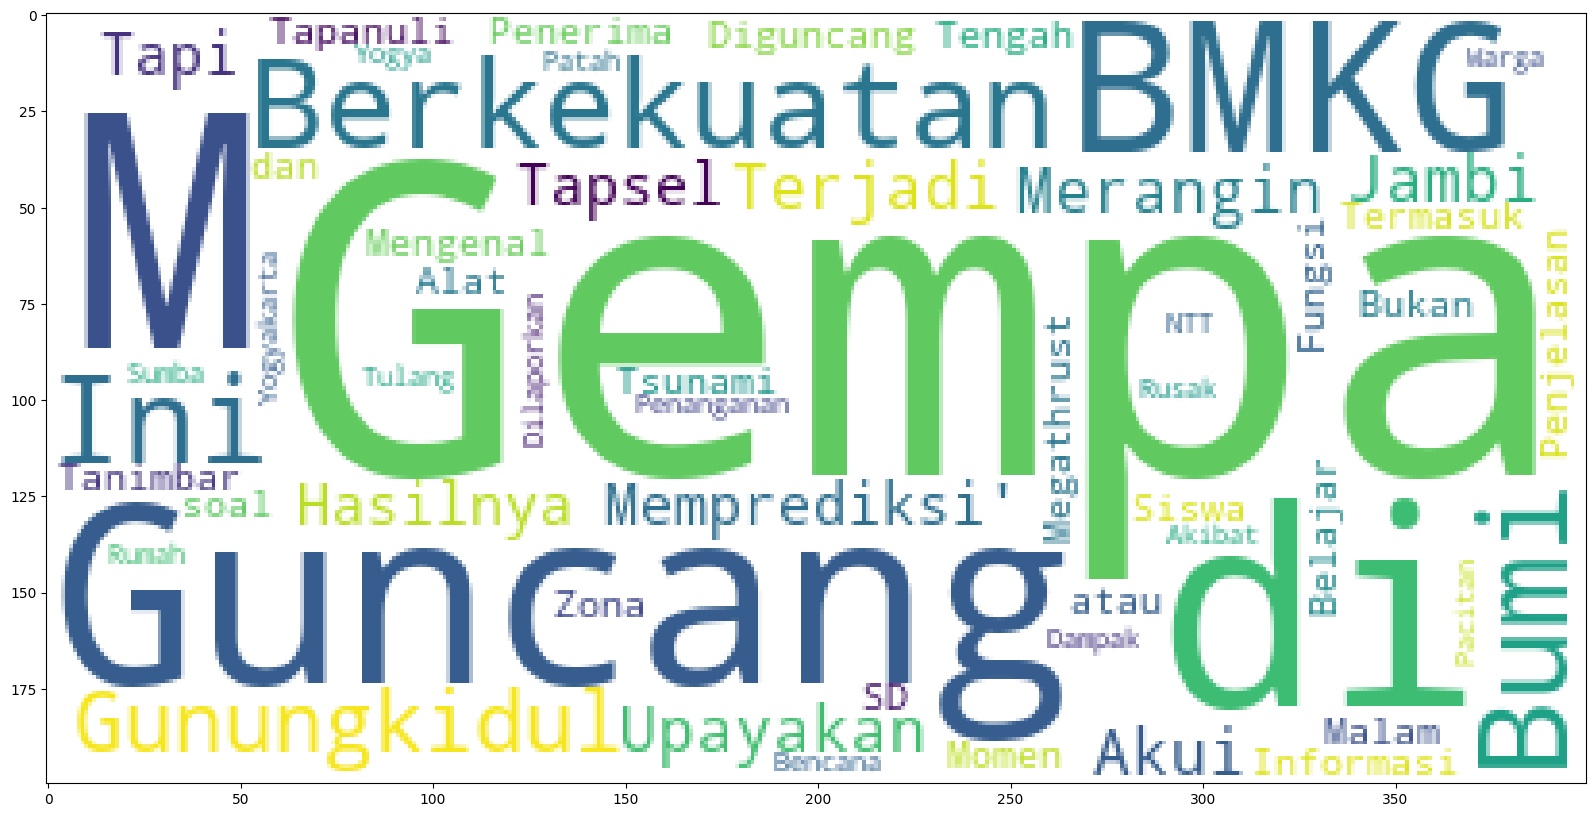

In [41]:
# Join the different processed titles together.
long_string = ','.join(list(df['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show()

## Analysis

Dari detik.com, diperoleh ada 12 data mengenai gempa. Dari tanggal 26 Agustus 2024 hingga 30 Agustus 2024, di waktu real kurang 6 menit. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.